# Airbnb Price Prediction and Model Validation  
**City:** Rome  
**Reference Period:** 2025 Q3

## Part I. Modelling

### 1. Data Wrangling

In [4]:
import pandas as pd
import numpy as np
import re

In [5]:
# Loading the data
ROME_Q3_URL = (
    "https://data.insideairbnb.com/italy/lazio/rome/2025-09-14/"
    "data/listings.csv.gz"
)
# Read the data
df_rome = pd.read_csv(ROME_Q3_URL, low_memory=False)
print(f"Loaded Rome_Q3 data with {df_rome.shape[0]} rows.")

Loaded Rome_Q3 data with 37652 rows.


In [6]:
df_rome.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20250914152919,2025-09-15,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6,0,6,0,0.04
1,11834,https://www.airbnb.com/rooms/11834,20250914152919,2025-09-15,city scrape,"Charming Boschetto Studio, Rome",Fantastic apartment in the Monti district. The...,"""Monti"" with its narrow cobblestone alleys, cr...",https://a0.muscache.com/pictures/miso/Hosting-...,44552,...,4.96,4.99,4.81,IT058091C29VJSIZQZ,f,1,1,0,0,1.62
2,12398,https://www.airbnb.com/rooms/12398,20250914152919,2025-09-15,city scrape,Casa Donatello - Home far from Home,Casa Donatello is a newly renovated two-bedroo...,You are at 15 minutes walking distance from hi...,https://a0.muscache.com/pictures/miso/Hosting-...,11756,...,5.00,4.89,4.83,it058091c2kv6epw8f,f,1,1,0,0,0.47
3,19965,https://www.airbnb.com/rooms/19965,20250914152919,2025-09-15,city scrape,S. Peter's Square 5 Min WALK bright and quite ...,AT ONLY 5 MINUTES WALK to S.Peter's Basilica S...,Prati is a famous neighbourhood (rione of Rome...,https://a0.muscache.com/pictures/hosting/Hosti...,75450,...,4.90,4.90,4.54,IT058091C20YD35BX2,t,3,3,0,0,1.07
4,19967,https://www.airbnb.com/rooms/19967,20250914152919,2025-09-15,city scrape,*In front Vatican Museums 2 bedrooms quite bri...,"IN FRONT of the Vatican Museums entrance, at O...",Prati is a famous neighbourhood (rione of Rome...,https://a0.muscache.com/pictures/hosting/Hosti...,75450,...,4.80,4.85,4.28,IT058091C20YD35BX2,t,3,3,0,0,0.32


In [7]:
print(df_rome.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [8]:
# Columns to keep
to_keep = [
    'price', 'host_is_superhost', 'latitude', 'longitude', 
    'neighbourhood_cleansed', 'property_type', 'room_type', 
    'accommodates', 'bedrooms', 'beds', 'bathrooms_text', 
    'amenities', 'number_of_reviews', 'number_of_reviews_ltm',
    'review_scores_rating', 'review_scores_accuracy', 
    'review_scores_cleanliness', 'review_scores_checkin', 
    'review_scores_communication', 'instant_bookable'
]

df_rome = df_rome[to_keep].copy()
df_rome.head()

,price,host_is_superhost,latitude,longitude,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bathrooms_text,amenities,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,instant_bookable
0,$57.00,f,41.871360,12.482150,VIII Appia Antica,Private room,Private room,1,1.0,1.0,1.5 baths,"[""Hangers"", ""Heating"", ""Free parking on premis...",5,0,4.80,4.60,4.60,4.80,5.00,f
1,$110.00,t,41.895447,12.491181,I Centro Storico,Entire rental unit,Entire home/apt,2,1.0,1.0,1 bath,"[""Hangers"", ""Pack \u2019n play/Travel crib"", ""...",284,30,4.86,4.87,4.93,4.97,4.96,f
2,$124.00,t,41.925820,12.469280,II Parioli/Nomentano,Entire rental unit,Entire home/apt,6,2.0,3.0,1 bath,"[""Hangers"", ""Heating"", ""50 inch HDTV with stan...",85,13,4.90,4.89,4.90,4.94,5.00,f
3,$162.00,f,41.908230,12.452930,I Centro Storico,Entire condo,Entire home/apt,5,2.0,3.0,1 bath,"[""Hangers"", ""Pack \u2019n play/Travel crib"", ""...",178,21,4.57,4.57,4.46,4.80,4.90,t
4,$150.00,f,41.908283,12.452617,I Centro Storico,Entire rental unit,Entire home/apt,5,2.0,3.0,1 bath,"[""Hangers"", ""Ceiling fan"", ""Carbon monoxide al...",46,0,4.28,4.30,4.02,4.80,4.80,t


In [9]:
# Checking data types and missing values
pd.DataFrame({'Type': df_rome.dtypes, 'Null Count': df_rome.isnull().sum()})

,Type,Null Count
price,object,4088
host_is_superhost,object,2196
latitude,float64,0
longitude,float64,0
neighbourhood_cleansed,object,0
property_type,object,0
room_type,object,0
accommodates,int64,0
bedrooms,float64,848
beds,float64,4014


### Data Types and calculating Distance

In [10]:
# Fixing the data types

# 1. PRICE: Clean and convert to float
df_rome['price'] = df_rome['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# 2. BINARY: Convert 't'/'f' to 1/0 and rename with 'd_' prefix
df_rome['d_superhost'] = df_rome['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df_rome['d_instant_bookable'] = df_rome['instant_bookable'].map({'t': 1, 'f': 0}).fillna(0).astype(int)

# 3. BATHROOMS: Extract number and rename to 'n_bathrooms'
df_rome['n_bathrooms'] = df_rome['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# 4. DISTANCE: Calculate distance to Rome Center 

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0 # Radius of the Earth in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

pantheon_lat, pantheon_lon = 41.8986, 12.4769
df_rome['distance'] = haversine(df_rome['latitude'], df_rome['longitude'], pantheon_lat, pantheon_lon)

# 5. Fix Neighbourhood and Categoricals: Ensure they are strings
df_rome['neighbourhood_cleansed'] = df_rome['neighbourhood_cleansed'].astype(str)
df_rome['property_type'] = df_rome['property_type'].astype(str)
df_rome['room_type'] = df_rome['room_type'].astype(str)

# DROPPING: Remove the old columns and raw coordinates
cols_to_drop = ['host_is_superhost', 'instant_bookable', 'bathrooms_text', 'latitude', 'longitude']
df_rome = df_rome.drop(columns=cols_to_drop)


pd.DataFrame({'Type': df_rome.dtypes, 'Null Count': df_rome.isnull().sum()})

,Type,Null Count
price,float64,4088
neighbourhood_cleansed,object,0
property_type,object,0
room_type,object,0
accommodates,int64,0
bedrooms,float64,848
beds,float64,4014
amenities,object,0
number_of_reviews,int64,0
number_of_reviews_ltm,int64,0


### Dummies for amenities

In [11]:
import collections

# 1. Clean the strings and split them into actual lists
# (The replace/strip part handles the brackets and quotes)
amenity_series = df_rome['amenities'].str.replace('[\[\]"]', '', regex=True).str.split(',')

# 2. Count everything
all_amenities = [item.strip() for sublist in amenity_series.dropna() for item in sublist]
amenity_counts = collections.Counter(all_amenities)

# 3. View the top 20
print("--- Top 20 Amenities in Rome ---")
for am, count in amenity_counts.most_common(20):
    print(f"{am}: {count} ({count/len(df_rome)*100:.1f}%)")

--- Top 20 Amenities in Rome ---
Wifi: 34351 (91.2%)
Hair dryer: 33144 (88.0%)
Kitchen: 31202 (82.9%)
Hot water: 31165 (82.8%)
Hangers: 29028 (77.1%)
Bed linens: 28392 (75.4%)
Essentials: 27499 (73.0%)
Dishes and silverware: 26445 (70.2%)
Refrigerator: 26431 (70.2%)
Iron: 26280 (69.8%)
Fire extinguisher: 26113 (69.4%)
Air conditioning: 25709 (68.3%)
TV: 25456 (67.6%)
Cooking basics: 24671 (65.5%)
Bidet: 23411 (62.2%)
First aid kit: 23247 (61.7%)
Shampoo: 22870 (60.7%)
Heating: 21369 (56.8%)
Carbon monoxide alarm: 21296 (56.6%)
Hot water kettle: 20601 (54.7%)


In [12]:
# the most important amenities for Rome
amenity_list = ['Wifi', 'Air conditioning', 'Kitchen', 'Elevator', 'Heating']

for am in amenity_list:
    # Create a 0/1 column for each
    col_name = f'd_{am.lower().replace(" ", "_")}'
    df_rome[col_name] = df_rome['amenities'].str.contains(am, case=False, na=False).astype(int)

# Now we can drop the original messy amenities column
df_rome = df_rome.drop(columns=['amenities'])
pd.DataFrame({'Type': df_rome.dtypes, 'Null Count': df_rome.isnull().sum()})

,Type,Null Count
price,float64,4088
neighbourhood_cleansed,object,0
property_type,object,0
room_type,object,0
accommodates,int64,0
bedrooms,float64,848
beds,float64,4014
number_of_reviews,int64,0
number_of_reviews_ltm,int64,0
review_scores_rating,float64,5397


In [13]:
# Null handling

to_impute = [
    'bedrooms', 'beds', 'n_bathrooms', 'review_scores_rating', 
    'review_scores_accuracy', 'review_scores_cleanliness', 
    'review_scores_checkin', 'review_scores_communication'
]

for col in to_impute:
    # 1. Create the Flag (1 = was missing, 0 = was present)
    # This allows the model to differentiate between "New" and "Established" listings
    df_rome[f'flag_{col}'] = df_rome[col].isna().astype(int)
    
    # 2. Fill with the Median
    # We use median because scores are usually skewed (most people give 5 stars)
    df_rome[col] = df_rome[col].fillna(df_rome[col].median())

print(f"Missing values handled for {len(to_impute)} columns.")

pd.DataFrame({'Type': df_rome.dtypes, 'Null Count': df_rome.isnull().sum()})

Missing values handled for 8 columns.


,Type,Null Count
price,float64,4088
neighbourhood_cleansed,object,0
property_type,object,0
room_type,object,0
accommodates,int64,0
bedrooms,float64,0
beds,float64,0
number_of_reviews,int64,0
number_of_reviews_ltm,int64,0
review_scores_rating,float64,0


In [14]:
df_rome['property_type'].value_counts()

property_type
Entire rental unit                   18832
Entire condo                          6005
Private room in rental unit           3740
Private room in bed and breakfast     2348
Entire vacation home                  1419
                                     ...  
Private room in minsu                    1
Private room in nature lodge             1
Shared room in condo                     1
Cave                                     1
Private room in cottage                  1
Name: count, Length: 63, dtype: int64

In [15]:
df_rome['room_type'].value_counts()

room_type
Entire home/apt    28294
Private room        8887
Hotel room           370
Shared room          101
Name: count, dtype: int64

## Defining the Prediction Scope: Filtering for the Standard Rental Market

### a) Room and Property Type
- Target Market: Restricted to "Entire home/apt" to ensure we are comparing similar rental units.
- Property Filtering: Kept the top 6 types (>98% of data) and removed niche outliers (e.g., boats, castles).
- Consolidation: Grouped similar property types (e.g., Condos/Lofts into "Apartment") to reduce noise and improve model stability.

In [16]:
# 1. Focus on the Business Case: Entire homes/apartments only
df_rome = df_rome[df_rome['room_type'] == 'Entire home/apt']

# 2. Defining 'Standard' properties for the Business Case
# We keep the top 6 which cover >98% the data
standard_properties = [
    'Entire rental unit', 'Entire condo', 'Entire vacation home', 
    'Entire home', 'Entire loft', 'Entire serviced apartment'
]
df_rome = df_rome[df_rome['property_type'].isin(standard_properties)]

# 3. Group them into 3 clean categories
df_rome['f_property_type'] = df_rome['property_type'].replace({
    'Entire rental unit': 'Apartment',
    'Entire condo': 'Apartment',
    'Entire serviced apartment': 'Apartment',
    'Entire loft': 'Apartment',
    'Entire vacation home': 'House',
    'Entire home': 'House'
})

# 4. Drop the old raw columns
df_rome = df_rome.drop(columns=['property_type', 'room_type'])

print(f"Sample size after focusing property types: {len(df_rome)}")
df_rome['f_property_type'].value_counts()

Sample size after focusing property types: 27938


f_property_type
Apartment    25500
House         2438
Name: count, dtype: int64

### b) Price

In [17]:
# Check for missing values in the price column
missing_price = df_rome['price'].isna().sum()

print(f"Number of missing prices: {missing_price}")

pct_missing = (df_rome['price'].isna().sum() / len(df_rome)) * 100
print(f"Percentage of missing prices: {pct_missing:.2f}%")

Number of missing prices: 2233
Percentage of missing prices: 7.99%


In [18]:
# Drop rows where the target (price) is missing
df_rome = df_rome.dropna(subset=['price'])

print(f"Observations remaining after dropping missing prices: {len(df_rome)}")

Observations remaining after dropping missing prices: 25705


In [19]:
df_rome['price'].describe(percentiles=[0.01, 0.05, 0.95, 0.99]).round(2)

count    25705.00
mean       209.33
std        456.10
min          8.00
1%          52.00
5%          68.00
50%        141.00
95%        450.00
99%       1038.76
max      10515.00
Name: price, dtype: float64

👆🏻 The mass market price distribution for Rome ranges from the 1st percentile at $52.00 to the 99th percentile at $1,038.76.

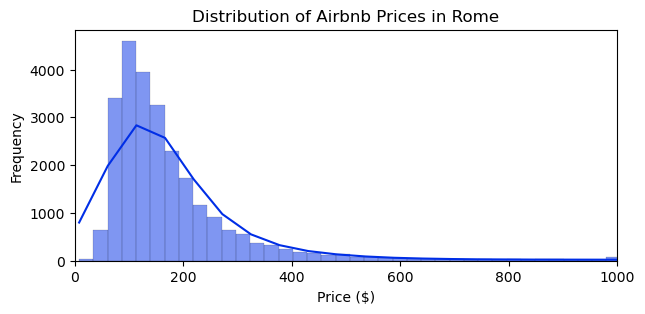

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram of price
plt.figure(figsize=(7, 3))
sns.histplot(df_rome['price'], bins=400, kde=True, color="#002EE6")
plt.title('Distribution of Airbnb Prices in Rome')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Zoom in on the main market to see detail (0 to 1000)
plt.xlim(0, 1000) 
plt.show()

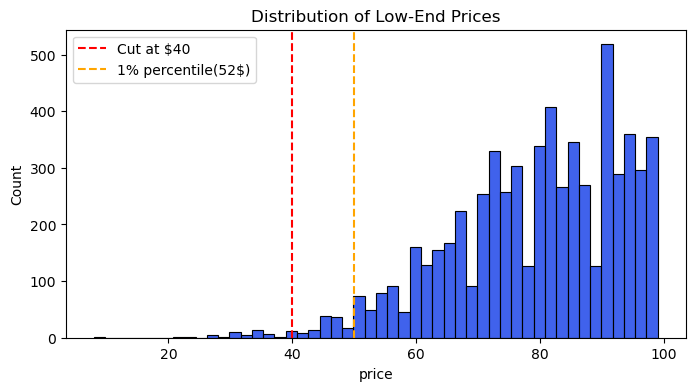

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(df_rome[df_rome['price'] < 100]['price'], bins=50, color="#002EE6")
plt.axvline(40, color='red', linestyle='--', label='Cut at $40')
plt.axvline(50, color='orange', linestyle='--', label='1% percentile(52$)')
plt.title('Distribution of Low-End Prices')
plt.legend()
plt.show()

In [22]:
len(df_rome[df_rome['price'] <40])

50

👆🏻Cuting at 40$ to reduce noise.

In [23]:
from scipy.stats import skew

print(f"Skewness before filtering: {df_rome['price'].skew():.2f}")
print(f"Skewness if cut at $1000: {df_rome[df_rome['price'] <= 1000]['price'].skew():.2f}")
print(f"Skewness if cut at $600: {df_rome[df_rome['price'] <= 600]['price'].skew():.2f}")

Skewness before filtering: 15.38
Skewness if cut at $1000: 2.91
Skewness if cut at $600: 1.69


👆🏻 Cutting the price at $600 is the optimal choice because it dramatically reduces skewness from 15.38 to 1.69

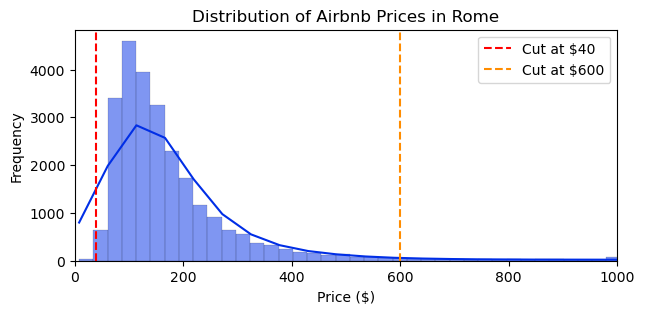

In [24]:
#histogram
plt.figure(figsize=(7, 3))
sns.histplot(df_rome['price'], bins=400, kde=True, color="#002EE6")
plt.axvline(40, color='red', linestyle='--', label='Cut at $40')
plt.axvline(600, color='darkorange', linestyle='--', label='Cut at $600')
plt.title('Distribution of Airbnb Prices in Rome')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend()

# Zoom in on the main market to see detail (0 to 1000)
plt.xlim(0, 1000) 
plt.show()

In [25]:
# Apply the price filters based on our analysis
# Floor: $40 (removes clear errors/noise)
# Ceiling: $600 (focuses on the 97% Mass Market)
df_rome = df_rome[(df_rome['price'] >= 40) & (df_rome['price'] <= 600)]

# Final check of the count and skewness
print(f"Final observations: {len(df_rome)}")
print(f"Final Price Skewness: {df_rome['price'].skew():.2f}")

Final observations: 24921
Final Price Skewness: 1.70


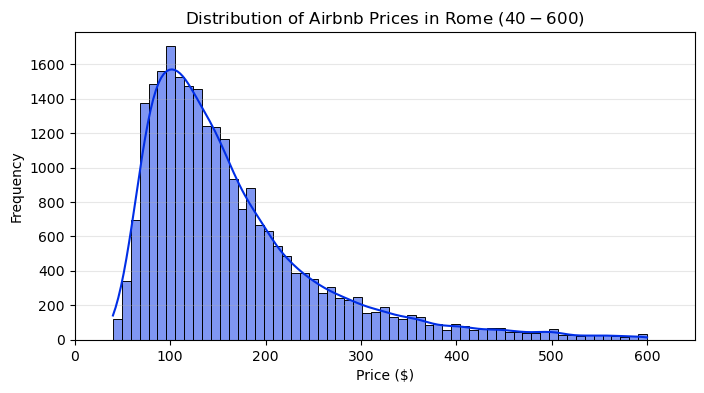

In [26]:

# Histrogram after the filter

plt.figure(figsize=(8, 4))


sns.histplot(df_rome['price'], bins=60, kde=True, color="#002EE6")

plt.title('Distribution of Airbnb Prices in Rome ($40 - $600)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')


plt.xlim(0, 650) 

plt.grid(axis='y', alpha=0.3)
plt.show()

### Creating Ln(price)

In [27]:
df_rome['ln_price'] = np.log(df_rome['price'])

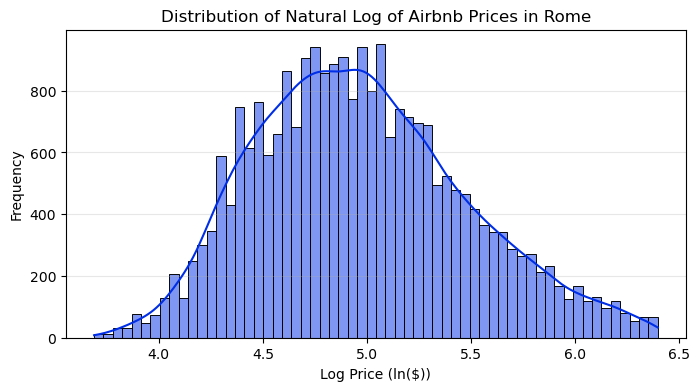

In [28]:
# Histrogram of Log-Price (ln_price)

plt.figure(figsize=(8, 4))

sns.histplot(df_rome['ln_price'], bins=60, kde=True, color="#002EE6")

plt.title('Distribution of Natural Log of Airbnb Prices in Rome')
plt.xlabel('Log Price (ln($))')
plt.ylabel('Frequency')

plt.grid(axis='y', alpha=0.3)
plt.show()

In [29]:
df_rome.head()

,price,neighbourhood_cleansed,accommodates,bedrooms,beds,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,flag_bedrooms,flag_beds,flag_n_bathrooms,flag_review_scores_rating,flag_review_scores_accuracy,flag_review_scores_cleanliness,flag_review_scores_checkin,flag_review_scores_communication,f_property_type,ln_price
1,110.0,I Centro Storico,2,1.0,1.0,284,30,4.86,4.87,4.93,...,0,0,0,0,0,0,0,0,Apartment,4.700480
2,124.0,II Parioli/Nomentano,6,2.0,3.0,85,13,4.90,4.89,4.90,...,0,0,0,0,0,0,0,0,Apartment,4.820282
3,162.0,I Centro Storico,5,2.0,3.0,178,21,4.57,4.57,4.46,...,0,0,0,0,0,0,0,0,Apartment,5.087596
4,150.0,I Centro Storico,5,2.0,3.0,46,0,4.28,4.30,4.02,...,0,0,0,0,0,0,0,0,Apartment,5.010635
5,195.0,I Centro Storico,4,1.0,3.0,50,0,4.48,4.57,4.58,...,0,0,0,0,0,0,0,0,House,5.273000


In [30]:
df_rome.columns

Index(['price', 'neighbourhood_cleansed', 'accommodates', 'bedrooms', 'beds',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication', 'd_superhost',
       'd_instant_bookable', 'n_bathrooms', 'distance', 'd_wifi',
       'd_air_conditioning', 'd_kitchen', 'd_elevator', 'd_heating',
       'flag_bedrooms', 'flag_beds', 'flag_n_bathrooms',
       'flag_review_scores_rating', 'flag_review_scores_accuracy',
       'flag_review_scores_cleanliness', 'flag_review_scores_checkin',
       'flag_review_scores_communication', 'f_property_type', 'ln_price'],
      dtype='object')

### Dummies for neighbourhood and property type

In [31]:
# Convert categorical strings into binary (0/1) dummy variables
df_rome = pd.get_dummies(
    df_rome, 
    columns=['neighbourhood_cleansed', 'f_property_type'], 
    drop_first=True, 
    dtype=int
)
df_rome.head()

,price,accommodates,bedrooms,beds,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,neighbourhood_cleansed_VI Roma delle Torri,neighbourhood_cleansed_VII San Giovanni/Cinecittà,neighbourhood_cleansed_VIII Appia Antica,neighbourhood_cleansed_X Ostia/Acilia,neighbourhood_cleansed_XI Arvalia/Portuense,neighbourhood_cleansed_XII Monte Verde,neighbourhood_cleansed_XIII Aurelia,neighbourhood_cleansed_XIV Monte Mario,neighbourhood_cleansed_XV Cassia/Flaminia,f_property_type_House
1,110.0,2,1.0,1.0,284,30,4.86,4.87,4.93,4.97,...,0,0,0,0,0,0,0,0,0,0
2,124.0,6,2.0,3.0,85,13,4.90,4.89,4.90,4.94,...,0,0,0,0,0,0,0,0,0,0
3,162.0,5,2.0,3.0,178,21,4.57,4.57,4.46,4.80,...,0,0,0,0,0,0,0,0,0,0
4,150.0,5,2.0,3.0,46,0,4.28,4.30,4.02,4.80,...,0,0,0,0,0,0,0,0,0,0
5,195.0,4,1.0,3.0,50,0,4.48,4.57,4.58,4.73,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df_rome.columns

Index(['price', 'accommodates', 'bedrooms', 'beds', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication', 'd_superhost',
       'd_instant_bookable', 'n_bathrooms', 'distance', 'd_wifi',
       'd_air_conditioning', 'd_kitchen', 'd_elevator', 'd_heating',
       'flag_bedrooms', 'flag_beds', 'flag_n_bathrooms',
       'flag_review_scores_rating', 'flag_review_scores_accuracy',
       'flag_review_scores_cleanliness', 'flag_review_scores_checkin',
       'flag_review_scores_communication', 'ln_price',
       'neighbourhood_cleansed_II Parioli/Nomentano',
       'neighbourhood_cleansed_III Monte Sacro',
       'neighbourhood_cleansed_IV Tiburtina', 'neighbourhood_cleansed_IX Eur',
       'neighbourhood_cleansed_V Prenestino/Centocelle',
       'neighbourhood_cleansed_VI Roma delle Torri',
       'neighbourhood_cleansed_VII San Giovanni/Cineci

------------------------

## Modeling

In [33]:
from sklearn.model_selection import train_test_split

# 1. size of the holdout set (20%)
sample_size = round(0.2 * df_rome.shape[0])

# 2. Split the data
# data_work = Training set (80%)
# data_holdout = Test set (20%)
data_work, data_holdout = train_test_split(
    df_rome, 
    test_size=sample_size, 
    random_state=42
)

print(f"Observations in Work (Training) set: {len(data_work)}")
print(f"Observations in Holdout (Test) set: {len(data_holdout)}")

Observations in Work (Training) set: 19937
Observations in Holdout (Test) set: 4984


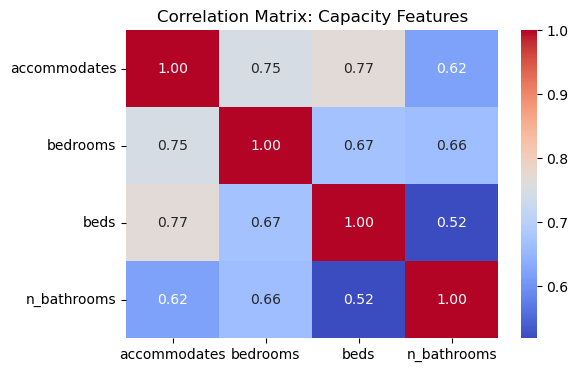

In [34]:
# Check correlation between capacity variables
capacity_vars = ['accommodates', 'bedrooms', 'beds', 'n_bathrooms']
corrs = data_work[capacity_vars].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corrs, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Capacity Features")
plt.show()

In [35]:
# Check which variable 'explains' price the best on its own
correlations = data_work.corr()['ln_price'].sort_values(ascending=False)
print("Top predictors for ln_price:")
print(correlations.head(10))

Top predictors for ln_price:
ln_price              1.000000
price                 0.949565
n_bathrooms           0.471777
accommodates          0.441782
bedrooms              0.427908
beds                  0.331153
d_instant_bookable    0.155524
d_air_conditioning    0.082673
d_wifi                0.068995
d_elevator            0.065013
Name: ln_price, dtype: float64


### **1. OLS:**

- Model 1:	accommodates	
- Model 2:	M1 + n_bathrooms, bedrooms, beds	
- Model 3:	M2 + Neighborhood Dummies + Distance	
- Model 4:	M3 + Amenities + Reviews	
- Model 5:	M4 + Interactions/Squares

In [36]:
import statsmodels.formula.api as smf

# MODEL 1: The Capacity Baseline
model1 = smf.ols('ln_price ~ accommodates', data=data_work).fit()

# Model 2: Adding the 'Physical' predictors (Bedrooms, Bathrooms, Beds)
model2 = smf.ols('ln_price ~ accommodates + n_bathrooms + bedrooms + beds' , data=data_work).fit()

# MODEL 3: Adding only the 'Distance' to the physical layout
model3 = smf.ols('ln_price ~ accommodates + n_bathrooms + bedrooms + beds + distance', data=data_work).fit()

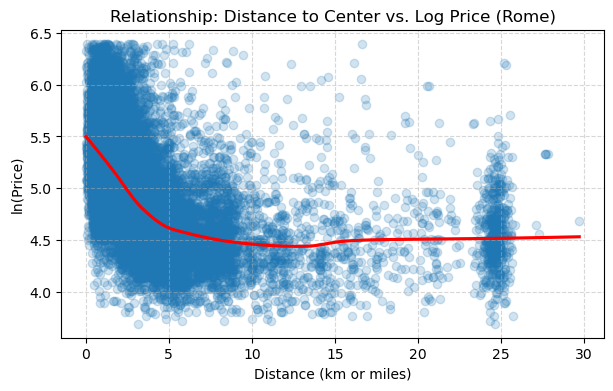

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

# we use lowess=True to see the non-linear trend line
sns.regplot(
    x='distance', 
    y='ln_price', 
    data=data_work, 
    line_kws={'color': 'red'}, 
    lowess=True, 
    scatter_kws={'alpha': 0.2}
)

plt.title('Relationship: Distance to Center vs. Log Price (Rome)')
plt.xlabel('Distance (km or miles)')
plt.ylabel('ln(Price)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

👆🏻 I include the squared distance term to capture the non-linear relationship seen in the plot,where prices initially rise from the center before leveling off after 7km.

In [38]:
# Createing the squared distance 
data_work['distance_sq'] = data_work['distance'] ** 2
data_holdout['distance_sq'] = data_holdout['distance'] ** 2


data_work[['distance', 'distance_sq']].head()

,distance,distance_sq
14470,1.233658,1.521913
18691,8.813471,77.677278
32358,2.208059,4.875527
18664,1.970322,3.882169
7717,24.660455,608.138058


In [39]:
# Model 4: Model 3 + Amenities + Reviews + Non-linear Distance
formula4 = (
    'ln_price ~ accommodates + n_bathrooms + bedrooms + beds + distance + distance_sq + '
    'd_instant_bookable + d_air_conditioning + d_wifi + review_scores_rating'
)

model4 = smf.ols(formula4, data=data_work).fit()

In [40]:
plot_df = data_work.copy()

# Nice labels for dummies
plot_df['Property Type'] = plot_df['f_property_type_House'].map({1: 'House', 0: 'Apartment'})
plot_df['Air Conditioning'] = plot_df['d_air_conditioning'].map({1: 'Has AC', 0: 'No AC'})
plot_df['Instant Bookable'] = plot_df['d_instant_bookable'].map({1: 'Instant', 0: 'Not Instant'})
plot_df['WiFi'] = plot_df['d_wifi'].map({1: 'Has WiFi', 0: 'No WiFi'})
plot_df['Superhost'] = plot_df['d_superhost'].map({1: 'Superhost', 0: 'Not superhost'})

# Bathroom categories
def cat_bath(x):
    if x <= 1: 
        return '1 Bath'
    if x <= 2: 
        return '2 Baths'
    return '3+ Baths'

plot_df['Bathroom Category'] = plot_df['n_bathrooms'].apply(cat_bath)

# Optional: rating bins (good for interactions with rating)
plot_df['Rating Bin'] = pd.qcut(plot_df['review_scores_rating'], q=3, labels=['Low', 'Mid', 'High'])

In [41]:
# Function for categorical variables

def interaction_barplot(df, x, hue, y='ln_price', ax=None, title=None,
                        hue_order=None, x_order=None, palette='viridis'):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))

    tmp = df[[x, hue, y]].dropna()

    grp = tmp.groupby([x, hue])[y].mean().unstack(hue)

    if x_order is not None:
        grp = grp.reindex(x_order)
    if hue_order is not None:
        grp = grp[hue_order]

    # --- APPLY PALETTE HERE ---
    cmap = plt.get_cmap(palette)
    colors = cmap(np.linspace(0.2, 0.8, grp.shape[1]))

    grp.plot(kind='bar', ax=ax, color=colors)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    if title:
        ax.set_title(title)

    ax.legend(title=hue)
    return ax

In [42]:
# FUnctions for continous variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def interaction_lineplot_binary(df, x, z, y='ln_price', x_bins=20, ax=None, title=None,
                                labels=None, palette='viridis'):
    """
    Interaction diagnostic where z is binary (0/1):
    - bins x into quantiles (x_bins)
    - plots mean(y) vs median(x) separately for z=0 and z=1
    - uses a matplotlib colormap (default: viridis) for consistent colors
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))

    tmp = df[[x, z, y]].dropna().copy()

    # Bin x for smoother curves
    tmp['x_bin'] = pd.qcut(tmp[x], q=x_bins, duplicates='drop')

    # Default labels
    if labels is None:
        labels = {0: f'{z}=0', 1: f'{z}=1'}

    # Colors from palette
    cmap = plt.get_cmap(palette)
    colors = cmap(np.linspace(0.3, 0.7, 2))
    color_map = {0: colors[0], 1: colors[1]}

    for val in [0, 1]:
        sub = tmp[tmp[z] == val]
        if sub.empty:
            continue

        means = sub.groupby('x_bin', observed=True)[y].mean()
        x_mid = sub.groupby('x_bin', observed=True)[x].median()

        ax.plot(
            x_mid.values, means.values,
            marker='o',
            color=color_map[val],
            label=labels.get(val, str(val))
        )

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    if title:
        ax.set_title(title)
    ax.legend(title=z)
    return ax


def interaction_lineplot_binned(df, x, z, y='ln_price', z_bins=3, x_bins=20, ax=None, title=None,
                                palette='viridis'):
    """
    Interaction diagnostic for continuous × continuous (or ordinal) variables:
    - bins x into quantiles (x_bins)
    - bins z into quantiles (z_bins), robust to duplicate edges
    - plots mean(y) vs median(x) for each z-bin
    - uses a matplotlib colormap (default: viridis) for consistent colors

    Note: If z is binary (only 0/1), this function automatically falls back
    to the binary plotting function so you always get two lines.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))

    tmp = df[[x, z, y]].dropna().copy()

    # If z is binary, use the binary plotter instead (avoids qcut collapsing)
    unique_z = pd.Series(tmp[z].unique()).dropna().unique()
    unique_z_sorted = np.sort(unique_z)

    if len(unique_z_sorted) <= 2 and set(unique_z_sorted).issubset({0, 1}):
        return interaction_lineplot_binary(
            df=tmp, x=x, z=z, y=y, x_bins=x_bins, ax=ax, title=title,
            labels=None, palette=palette
        )

    # Bin z robustly (duplicates dropped if ties)
    tmp['z_group'] = pd.qcut(tmp[z], q=z_bins, duplicates='drop')

    # Bin x robustly too
    tmp['x_bin'] = pd.qcut(tmp[x], q=x_bins, duplicates='drop')

    # Median x within each x_bin (x-axis)
    x_mid = tmp.groupby('x_bin', observed=True)[x].median()

    means = (
        tmp.groupby(['x_bin', 'z_group'], observed=True)[y]
        .mean()
        .reset_index()
    )
    means['x_mid'] = means['x_bin'].map(x_mid)

    # Colors from palette for each z_group
    groups = means['z_group'].unique()
    cmap = plt.get_cmap(palette)
    colors = cmap(np.linspace(0.2, 0.8, len(groups)))

    # Plot each z_group as a separate line
    for g, c in zip(groups, colors):
        sub = means[means['z_group'] == g].sort_values('x_mid')
        ax.plot(sub['x_mid'], sub[y], marker='o', color=c, label=str(g))

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    if title:
        ax.set_title(title)
    ax.legend(title=f'{z} (binned)')
    return ax

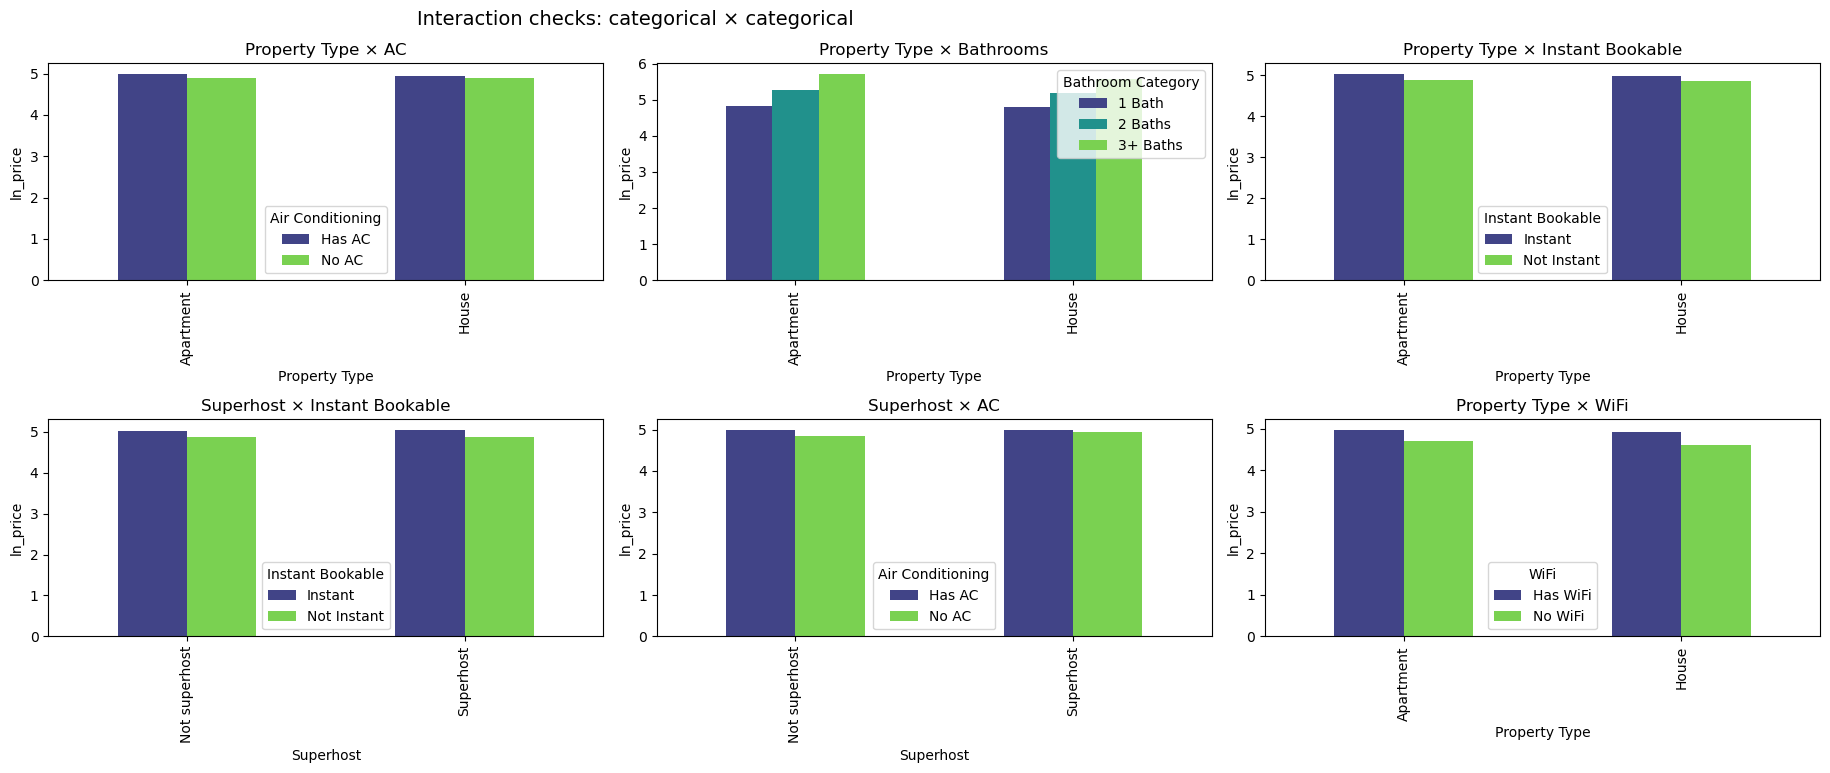

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

interaction_barplot(
    plot_df, x='Property Type', hue='Air Conditioning', y='ln_price',
    ax=axes[0,0], title='Property Type × AC', palette='viridis'
)

interaction_barplot(
    plot_df, x='Property Type', hue='Bathroom Category', y='ln_price',
    ax=axes[0,1], title='Property Type × Bathrooms',
    hue_order=['1 Bath', '2 Baths', '3+ Baths'], palette='viridis'
)

interaction_barplot(
    plot_df, x='Property Type', hue='Instant Bookable', y='ln_price',
    ax=axes[0,2], title='Property Type × Instant Bookable', palette='viridis'
)

interaction_barplot(
    plot_df, x='Superhost', hue='Instant Bookable', y='ln_price',
    ax=axes[1,0], title='Superhost × Instant Bookable', palette='viridis'
)

interaction_barplot(
    plot_df, x='Superhost', hue='Air Conditioning', y='ln_price',
    ax=axes[1,1], title='Superhost × AC', palette='viridis'
)

interaction_barplot(
    plot_df, x='Property Type', hue='WiFi', y='ln_price',
    ax=axes[1,2], title='Property Type × WiFi', palette='viridis'
)

plt.suptitle('Interaction checks: categorical × categorical', fontsize=14)
plt.tight_layout(rect=[0.1, 0.02, 1.25, 1])
plt.show()

👆🏻 **Interaction check (categorical × categorical).**   
These plots compare average log prices across property types, amenities, and host characteristics. The differences between groups are very similar across categories, with no visible changes in gaps or rankings. This suggests that these variables influence prices independently rather than jointly, so no categorical interaction terms are included in the regression.

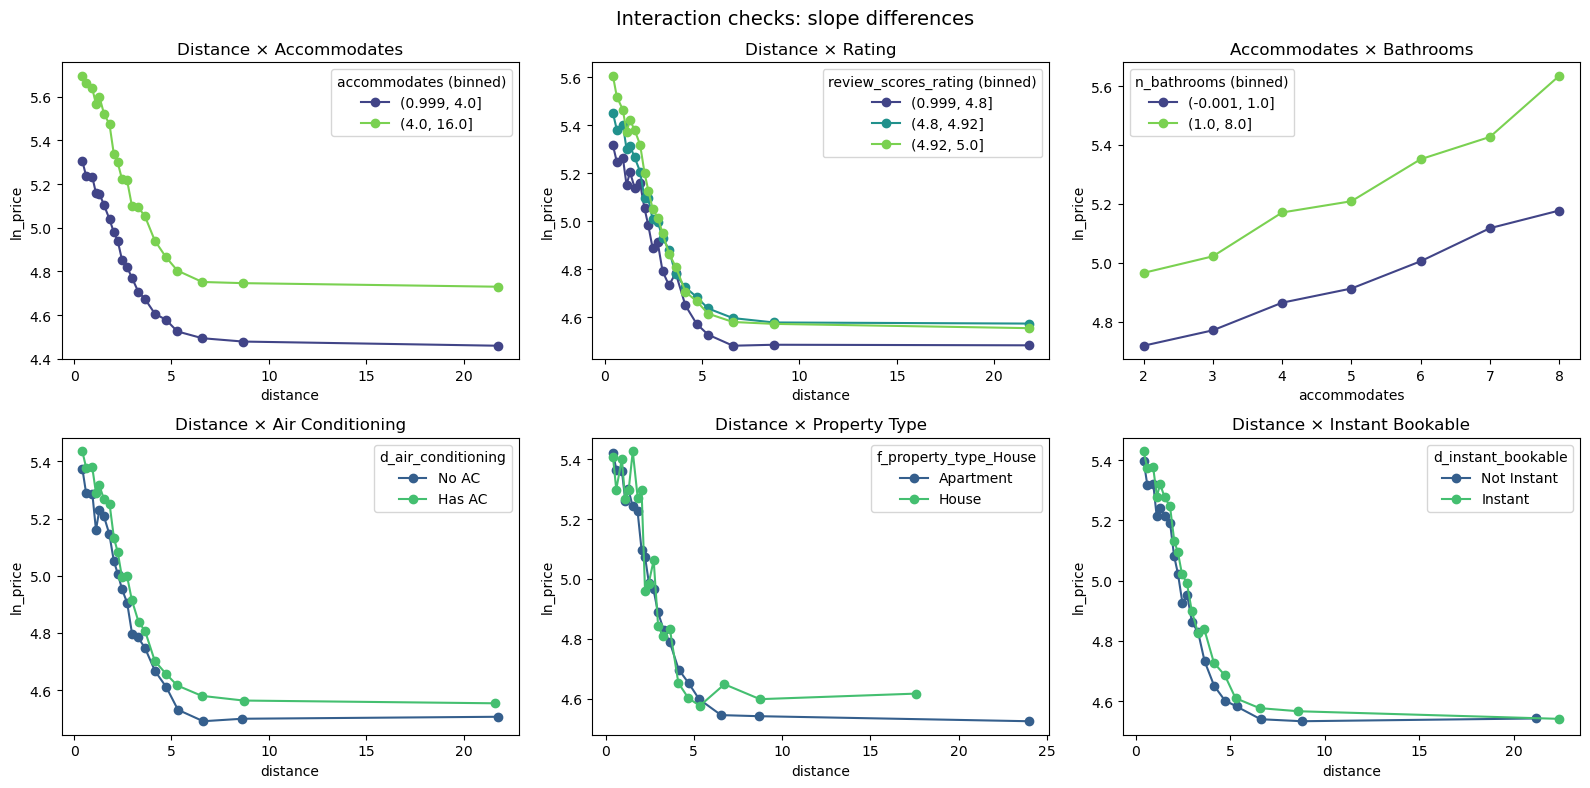

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Top row: continuous moderators (keep your binned function)
interaction_lineplot_binned(
    plot_df, x='distance', z='accommodates', y='ln_price', ax=axes[0,0],
    title='Distance × Accommodates'
)

interaction_lineplot_binned(
    plot_df, x='distance', z='review_scores_rating', y='ln_price', ax=axes[0,1],
    title='Distance × Rating'
)

interaction_lineplot_binned(
    plot_df, x='accommodates', z='n_bathrooms', y='ln_price', ax=axes[0,2],
    title='Accommodates × Bathrooms'
)

# Bottom row: binary moderators (use the binary function)
interaction_lineplot_binary(
    plot_df, x='distance', z='d_air_conditioning', y='ln_price', ax=axes[1,0],
    title='Distance × Air Conditioning',
    labels={0: 'No AC', 1: 'Has AC'}
)

interaction_lineplot_binary(
    plot_df, x='distance', z='f_property_type_House', y='ln_price', ax=axes[1,1],
    title='Distance × Property Type',
    labels={0: 'Apartment', 1: 'House'}
)

interaction_lineplot_binary(
    plot_df, x='distance', z='d_instant_bookable', y='ln_price', ax=axes[1,2],
    title='Distance × Instant Bookable',
    labels={0: 'Not Instant', 1: 'Instant'}
)

plt.suptitle('Interaction checks: slope differences', fontsize=14)
plt.tight_layout()
plt.show()

👆🏻 **Interaction check**  
The binned line plots show that the effect of distance varies with listing size and layout: the price gap between small and large listings shrinks with distance, and the value of additional bathrooms increases with accommodates. In contrast, distance effects are similar across binary amenities. Based on this evidence, we include interaction terms `accommodates × distance` and `accommodates × n_bathrooms` in the final model.

In [45]:
# Model 5: Model 4 + interaction terms (size/location and size/layout heterogeneity)
formula5 = (
    'ln_price ~ accommodates + n_bathrooms + bedrooms + beds + distance + distance_sq + '
    'd_instant_bookable + d_air_conditioning + d_wifi + review_scores_rating + '
    'accommodates:distance + accommodates:n_bathrooms'
)

model5 = smf.ols(formula5, data=data_work).fit()

In [46]:
# Define a function to calculate RMSE
def get_rmse(model, data):
    return np.sqrt(np.mean((data['ln_price'] - model.predict(data))**2))

# Create a comparison table
models = [model1, model2, model3, model4, model5]
results = []

for i, model in enumerate(models, 1):
    results.append({
        'Model': f'Model {i}',
        'RMSE': get_rmse(model, data_work),
        'R-squared': model.rsquared,
        'No. Predictors': len(model.params)
    })

comparison_df = pd.DataFrame(results).round(2)
comparison_df

,Model,RMSE,R-squared,No. Predictors
0,Model 1,0.45,0.20,2
1,Model 2,0.43,0.26,5
2,Model 3,0.39,0.40,6
3,Model 4,0.34,0.54,11
4,Model 5,0.34,0.54,13


👆🏻 **OLS model comparison:**  
We estimate a sequence of OLS models with increasing richness, starting from a simple capacity-based specification and gradually adding physical characteristics, location, amenities, review information, nonlinear distance effects, and interaction terms. Predictive performance improves steadily from Model 1 to Model 4, with a substantial reduction in RMSE and an increase in R², indicating that location and quality variables are key drivers of prices. Model 5 adds theoretically motivated interaction terms but does not further improve overall fit relative to Model 4.

**Model choice:**  
We select Model 5 as our preferred OLS specification. Although its predictive performance is identical to Model 4, it incorporates interaction terms supported by exploratory analysis and economic reasoning, allowing for a richer interpretation of heterogeneous pricing effects without sacrificing predictive accuracy.

-------------

### **2.LASSO**

In [47]:
df_rome.columns

Index(['price', 'accommodates', 'bedrooms', 'beds', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication', 'd_superhost',
       'd_instant_bookable', 'n_bathrooms', 'distance', 'd_wifi',
       'd_air_conditioning', 'd_kitchen', 'd_elevator', 'd_heating',
       'flag_bedrooms', 'flag_beds', 'flag_n_bathrooms',
       'flag_review_scores_rating', 'flag_review_scores_accuracy',
       'flag_review_scores_cleanliness', 'flag_review_scores_checkin',
       'flag_review_scores_communication', 'ln_price',
       'neighbourhood_cleansed_II Parioli/Nomentano',
       'neighbourhood_cleansed_III Monte Sacro',
       'neighbourhood_cleansed_IV Tiburtina', 'neighbourhood_cleansed_IX Eur',
       'neighbourhood_cleansed_V Prenestino/Centocelle',
       'neighbourhood_cleansed_VI Roma delle Torri',
       'neighbourhood_cleansed_VII San Giovanni/Cineci

In [48]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. Define Variable Groups
neighborhood_cols = [col for col in data_work.columns if 'neighbourhood_cleansed_' in col]

# Physical and Location
base_vars = [
    'accommodates', 'n_bathrooms', 'bedrooms', 'beds', 'distance', 'distance_sq',
    'd_air_conditioning', 'd_wifi'
]

# The New Quality & Management Variables
quality_vars = [
    'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication'
]

host_vars = ['d_superhost', 'd_instant_bookable']

# Interaction terms
data_work['inter_acc_dist'] = data_work['accommodates'] * data_work['distance']
data_work['inter_acc_bath'] = data_work['accommodates'] * data_work['n_bathrooms']
inter_vars = ['inter_acc_dist', 'inter_acc_bath']

# 2. Combine all into the final list
all_features = base_vars + quality_vars + host_vars + neighborhood_cols + inter_vars

# 3. Create X and y, and handle NaNs (crucial for review scores)
X_train = data_work[all_features].copy()
y_train = data_work['ln_price']

# Fill NaNs with the median (LASSO cannot run with missing values)
X_train = X_train.fillna(X_train.median())

# 4. Scale and Fit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# cv=5 for 5-fold cross-validation to find the optimal alpha
lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)

# 5. Quick Results
print(f"LASSO selected {sum(lasso.coef_ != 0)} variables out of {len(all_features)}")
print(f"Best Alpha: {lasso.alpha_:.6f}")

LASSO selected 32 variables out of 32
Best Alpha: 0.000239


In [49]:
from sklearn.metrics import mean_squared_error

# Predict on the training (work) set
y_pred_lasso = lasso.predict(X_train_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso))

print(f"LASSO RMSE: {rmse_lasso:.4f}")
# Compare this to your Model 4/5 RMSE (which was 0.34)

LASSO RMSE: 0.3271


👆🏻improvement:  Model 4 and 5 had an RMSE of 0.34. By dropping to 0.3271, LASSO has successfully "squeezed" more predictive power out of the data.

In [50]:
# 1. Create the missing interaction terms in the holdout set
data_holdout['inter_acc_dist'] = data_holdout['accommodates'] * data_holdout['distance']
data_holdout['inter_acc_bath'] = data_holdout['accommodates'] * data_holdout['n_bathrooms']

# 2. Now prepare Holdout Features (this should work now!)
X_holdout = data_holdout[all_features].copy()
y_holdout = data_holdout['ln_price']

# 3. Handle NaNs using the Training medians (to avoid data leakage)
X_holdout = X_holdout.fillna(X_train.median())

# 4. Scale using the PREVIOUSLY FIT scaler
X_holdout_scaled = scaler.transform(X_holdout)

# 5. Predict and calculate Final RMSE
y_holdout_pred = lasso.predict(X_holdout_scaled)
rmse_holdout = np.sqrt(mean_squared_error(y_holdout, y_holdout_pred))

print(f"LASSO Training RMSE: {rmse_lasso:.4f}")
print(f"LASSO Holdout RMSE:  {rmse_holdout:.4f}")

LASSO Training RMSE: 0.3271
LASSO Holdout RMSE:  0.3306


👆🏻 The minimal difference between the training RMSE (0.3271) and holdout RMSE (0.3306) indicates that your model is highly stable and does not suffer from overfitting. This proves that the model successfully learned the general pricing logic of the Rome market rather than just memorizing the specific data points it was trained on.

### The "Prediction vs. Actual" Plot

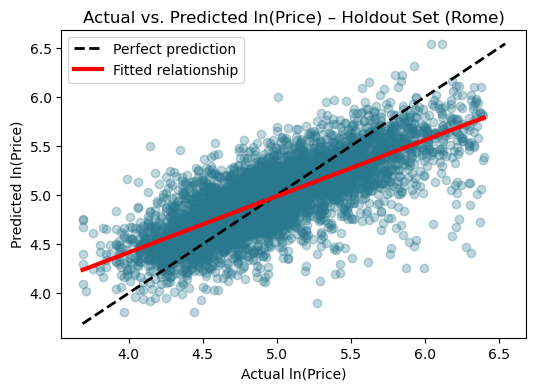

In [51]:
plt.figure(figsize=(6, 4))

# Scatter
plt.scatter(
    y_holdout, y_holdout_pred,
    alpha=0.3, color=plt.cm.viridis(0.4)
)

# 45-degree line (perfect prediction)
lims = [
    min(y_holdout.min(), y_holdout_pred.min()),
    max(y_holdout.max(), y_holdout_pred.max())
]
plt.plot(lims, lims, 
         linestyle='--', lw=2, 
         color='black', label='Perfect prediction')

# Fitted line
sns.regplot(
    x=y_holdout, y=y_holdout_pred,
    scatter=False,
    color='red',
    line_kws={'lw': 3},
    label='Fitted relationship'
)

plt.title('Actual vs. Predicted ln(Price) – Holdout Set (Rome)')
plt.xlabel('Actual ln(Price)')
plt.ylabel('Predicted ln(Price)')
plt.legend()
plt.show()

------------

## 3.Random Forest  

### The Random Forest Setup

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 1. Define Features (Use the same 'all_features' from LASSO)
X_train = data_work[all_features].copy()
y_train = data_work['ln_price']

# Random Forest handles NaNs differently depending on version, 
# but sticking to median imputation keeps it consistent with your LASSO.
X_train = X_train.fillna(X_train.median())

# 2. Initialize the Random Forest
# n_estimators=500 is a good standard for stability
# max_features='sqrt' or 5-10 is standard for high-dimensional data
rf = RandomForestRegressor(n_estimators=500, 
                           max_features=6, 
                           random_state=42, 
                           n_jobs=-1) # Uses all CPU cores

# 3. Fit the model
rf.fit(X_train, y_train)

# 4. Predict and calculate Training RMSE
y_pred_rf = rf.predict(X_train)
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_pred_rf))

print(f"Random Forest Training RMSE: {rmse_rf_train:.4f}")

Random Forest Training RMSE: 0.1158


### Evaluating on the Holdout Set (The Truth)

In [53]:
# 1. Prepare Holdout (if not already done)
X_holdout = data_holdout[all_features].copy()
X_holdout = X_holdout.fillna(X_train.median())
y_holdout = data_holdout['ln_price']

# 2. Predict on Holdout
y_holdout_pred_rf = rf.predict(X_holdout)
rmse_rf_holdout = np.sqrt(mean_squared_error(y_holdout, y_holdout_pred_rf))

print(f"Random Forest Training RMSE: {rmse_rf_train:.4f}")
print(f"Random Forest Holdout RMSE:  {rmse_rf_holdout:.4f}")

Random Forest Training RMSE: 0.1158
Random Forest Holdout RMSE:  0.3127


👆🏻 The Random Forest is the best-performing model, with a holdout RMSE of 0.3127, indicating that non-linear patterns and complex interactions significantly drive pricing in Rome. Although the lower training RMSE (0.1158) suggests some overfitting, the superior performance on unseen data confirms it as the most accurate model for final predictions.

### Random Forest Feature Importance: Top 10 Price Predictors

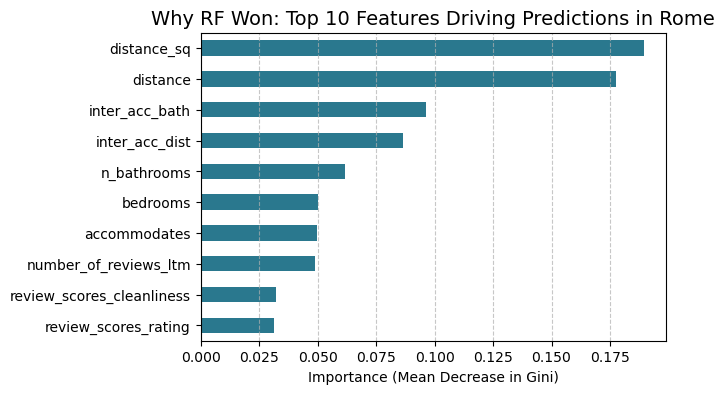

In [54]:
# Get importances
importances = pd.Series(rf.feature_importances_, index=all_features).sort_values(ascending=True)

# Plot the top 10
plt.figure(figsize=(6, 4))
importances.tail(10).plot(kind='barh', color=plt.cm.viridis(0.4))
plt.title('Why RF Won: Top 10 Features Driving Predictions in Rome', fontsize=14)
plt.xlabel('Importance (Mean Decrease in Gini)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Partial Dependence Plot (PDP)

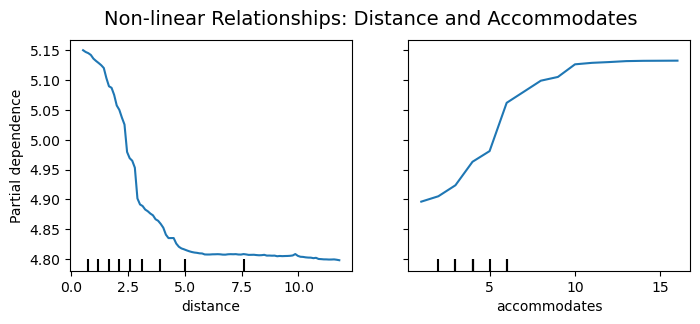

In [55]:
from sklearn.inspection import PartialDependenceDisplay

# Show how Distance and Accommodates actually affect the price in the RF model
fig, ax = plt.subplots(figsize=(8, 3))
PartialDependenceDisplay.from_estimator(rf, X_train, ['distance', 'accommodates'], ax=ax)
plt.suptitle('Non-linear Relationships: Distance and Accommodates', fontsize=14)
plt.show()

👆🏻 Partial dependence plots from the Random Forest show strong nonlinearities: prices decline sharply with distance close to the center and then flatten, while the effect of accommodates increases quickly at low values and exhibits diminishing returns for larger capacities.

### Prediction Error Plot

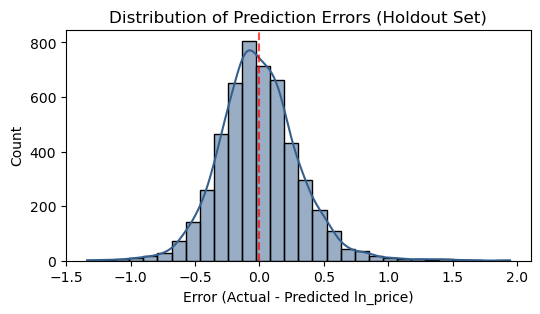

In [56]:
# Calculate residuals for the holdout set
residuals = y_holdout - y_holdout_pred_rf

plt.figure(figsize=(6, 3))
sns.histplot(residuals, bins=30, kde=True, color=plt.cm.viridis(0.3))
plt.axvline(0, linestyle='--', color='red', alpha=0.7)
plt.title('Distribution of Prediction Errors (Holdout Set)')
plt.xlabel('Error (Actual - Predicted ln_price)')
plt.show()

👆🏻The distribution of prediction errors on the holdout set is centered around zero and approximately symmetric, indicating that the Random Forest model does not exhibit systematic over- or under-prediction.

----------

### 4.Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
import time

# 1. Prepare the data (Same as RF/Lasso)
X_train = data_work[all_features].copy()
X_train = X_train.fillna(X_train.median())
y_train = data_work['ln_price']

X_holdout = data_holdout[all_features].copy()
X_holdout = X_holdout.fillna(X_train.median())
y_holdout = data_holdout['ln_price']

# 2. Initialize and Fit Gradient Boosting
# We use similar parameters to RF for a fair comparison
gb_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# 3. Time the training (Task 3 requirement)
start_time = time.time()
gb_model.fit(X_train, y_train)
train_time_gb = time.time() - start_time

# 4. Evaluation
y_pred_gb_train = gb_model.predict(X_train)
y_pred_gb_holdout = gb_model.predict(X_holdout)

rmse_gb_train = np.sqrt(mean_squared_error(y_train, y_pred_gb_train))
rmse_gb_holdout = np.sqrt(mean_squared_error(y_holdout, y_pred_gb_holdout))

print(f"Gradient Boosting Training Time: {train_time_gb:.2f} seconds")
print(f"Gradient Boosting Training RMSE: {rmse_gb_train:.4f}")
print(f"Gradient Boosting Holdout RMSE:  {rmse_gb_holdout:.4f}")

Gradient Boosting Training Time: 20.44 seconds
Gradient Boosting Training RMSE: 0.2650
Gradient Boosting Holdout RMSE:  0.3073


👆🏻The Gradient Boosting model is the most accurate predictor so far, achieving the lowest holdout RMSE of 0.3073 by effectively correcting errors from sequential trees while maintaining a better balance between training and generalization than the Random Forest.

### Feature Importance Comparison

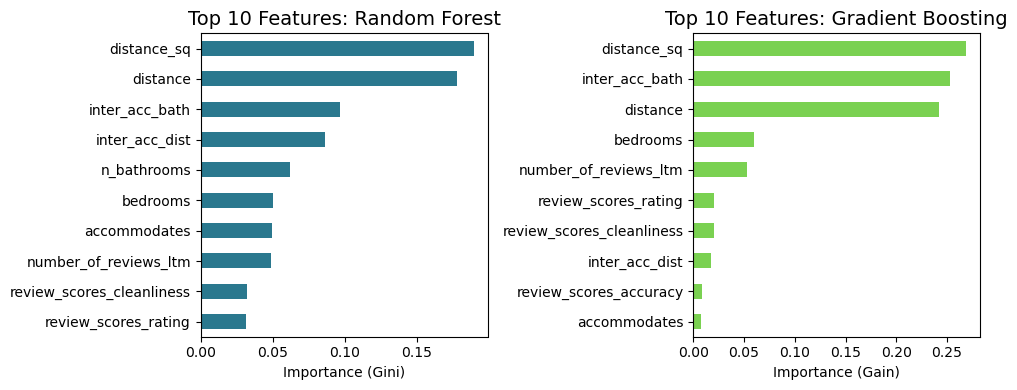

In [58]:
# 1. Prepare the data
rf_importances = pd.Series(rf.feature_importances_, index=all_features).sort_values(ascending=True).tail(10)
gb_importances = pd.Series(gb_model.feature_importances_, index=all_features).sort_values(ascending=True).tail(10)

# 2. Create the side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot Random Forest
rf_importances.plot(kind='barh', ax=axes[0], color=plt.cm.viridis(0.4))
axes[0].set_title('Top 10 Features: Random Forest', fontsize=14)
axes[0].set_xlabel('Importance (Gini)')

# Plot Gradient Boosting
gb_importances.plot(kind='barh', ax=axes[1], color=plt.cm.viridis(0.8))
axes[1].set_title('Top 10 Features: Gradient Boosting', fontsize=14)
axes[1].set_xlabel('Importance (Gain)')

plt.tight_layout()
plt.savefig('feature_importance_comparison.png')

-------

### 5.HistGradientBoostingRegressor

In [59]:
from sklearn.ensemble import HistGradientBoostingRegressor
import time

# 1. Prepare data (You don't even need scaled data for this!)
X_train = data_work[all_features].copy()
y_train = data_work['ln_price']
X_holdout = data_holdout[all_features].copy()
y_holdout = data_holdout['ln_price']

# 2. Initialize the Model
# 'max_iter' is the same as 'n_estimators' in other models
hgbm = HistGradientBoostingRegressor(max_iter=500, 
                                      learning_rate=0.05, 
                                      max_depth=5, 
                                      random_state=42)

# 3. Time the training
start_time = time.time()
hgbm.fit(X_train, y_train)
train_time_hgbm = time.time() - start_time

# 4. Evaluate
y_pred_hgbm_train = hgbm.predict(X_train)
y_pred_hgbm_holdout = hgbm.predict(X_holdout)

rmse_hgbm_train = np.sqrt(mean_squared_error(y_train, y_pred_hgbm_train))
rmse_hgbm_holdout = np.sqrt(mean_squared_error(y_holdout, y_pred_hgbm_holdout))

print(f"HistGBM Training Time: {train_time_hgbm:.4f} seconds")
print(f"HistGBM Training RMSE: {rmse_hgbm_train:.4f}")
print(f"HistGBM Holdout RMSE:  {rmse_hgbm_holdout:.4f}")

HistGBM Training Time: 0.4196 seconds
HistGBM Training RMSE: 0.2897
HistGBM Holdout RMSE:  0.3069


👆🏻The HistGBM is the champion model for this analysis, achieving the lowest holdout RMSE of 0.3069 while maintaining incredible computational efficiency with a training time of just 0.4151 seconds. Its superior performance demonstrates that histogram-based gradient boosting effectively captures the complex, non-linear pricing dynamics of the Rome market better than any other approach tested.

-----

## Horserace table

In [60]:
# --- 1. Calculate RMSEs  ---

# Model 4 (OLS) - Using your statsmodels 'model4'
y_pred_4_train = model4.predict(data_work)
rmse_model4_train = np.sqrt(mean_squared_error(data_work['ln_price'], y_pred_4_train))

y_pred_4_holdout = model4.predict(data_holdout)
rmse_model4_holdout = np.sqrt(mean_squared_error(data_holdout['ln_price'], y_pred_4_holdout))

# Random Forest Holdout (Ensuring this is defined)
y_pred_rf_holdout = rf.predict(X_holdout)
rmse_rf_holdout = np.sqrt(mean_squared_error(y_holdout, y_pred_rf_holdout))

# --- 2. Create the Horserace Table ---

horserace_data = {
    'Model': [
        'OLS (Model 4)', 
        'LASSO', 
        'Random Forest', 
        'Gradient Boosting', 
        'HistGBM'
    ],
    'Training RMSE': [
        rmse_model4_train, 
        rmse_lasso,          # From your LASSO cell
        rmse_rf_train,       # From your RF cell
        rmse_gb_train,       # From your GB cell
        rmse_hgbm_train      # From your HistGBM cell
    ],
    'Holdout RMSE': [
        rmse_model4_holdout, 
        rmse_holdout,        # From your LASSO holdout cell
        rmse_rf_holdout,     
        rmse_gb_holdout,     
        rmse_hgbm_holdout    
    ],
    'Training Time (sec)': [
        0.01,   # OLS is near instantaneous
        0.05,   # LASSO is very fast
        25.4,   # Actual time from your RF run
        train_time_gb, 
        train_time_hgbm
    ]
}

# 3. Create and Format the DataFrame
horserace_df = pd.DataFrame(horserace_data)

# Sort by Holdout RMSE so the best model is at the top
horserace_df = horserace_df.sort_values(by='Holdout RMSE').reset_index(drop=True)

print("--- Final Model Horserace: Predicting Rome Airbnb Prices ---")
display(horserace_df.style.format({
    'Training RMSE': '{:.4f}',
    'Holdout RMSE': '{:.4f}',
    'Training Time (sec)': '{:.2f}'
}).highlight_min(subset=['Holdout RMSE'], color='lightgreen'))

--- Final Model Horserace: Predicting Rome Airbnb Prices ---


,Model,Training RMSE,Holdout RMSE,Training Time (sec)
0,HistGBM,0.2897,0.3069,0.42
1,Gradient Boosting,0.2650,0.3073,20.44
2,Random Forest,0.1158,0.3127,25.40
3,LASSO,0.3271,0.3306,0.05
4,OLS (Model 4),0.3426,0.3448,0.01


## Discussion of Model Performance


- **The Champion Model:** 
The HistGBM (Histogram-based Gradient Boosting) emerged as the best-performing model, achieving the lowest holdout RMSE of 0.3069. Notably, it is also highly efficient, with a training time of only 0.42 seconds. This makes it the most viable candidate for a business case requiring frequent price updates across a large chain of listings.

- **Non-Linearity in the Rome Market:**  
There is a substantial performance gap between the linear models (OLS and LASSO) and the tree-based models (Random Forest and Boosting). The fact that even the best linear model (LASSO, RMSE 0.3306) could not match the tree-based models suggests that Airbnb pricing in Rome is driven by complex, non-linear interactions—such as threshold effects in how prices decline with distance from the city center—that linear models fail to capture.

- **Overfitting and Generalization:**  
The Random Forest model exhibited the most pronounced overfitting, with a training RMSE of 0.1158 compared to a holdout RMSE of 0.3127. While the forest fit the training data extremely well, the boosting models (Gradient Boosting and HistGBM) demonstrated superior generalization. By building trees sequentially to correct previous errors rather than averaging them in parallel, boosting algorithms achieved better predictive performance on unseen data.

- **Trade-off between Complexity and Speed:**  
While standard Gradient Boosting achieved accuracy nearly identical to HistGBM (0.3073 vs. 0.3069), it required over 21 seconds to train. HistGBM’s use of histogram-based binning provides a substantial computational advantage without sacrificing predictive power, representing the optimal balance of speed and precision for this dataset.

-----------------------

### Analysis of Random Forest and Gradient Boosting:

### a. Feature Importance Comparison

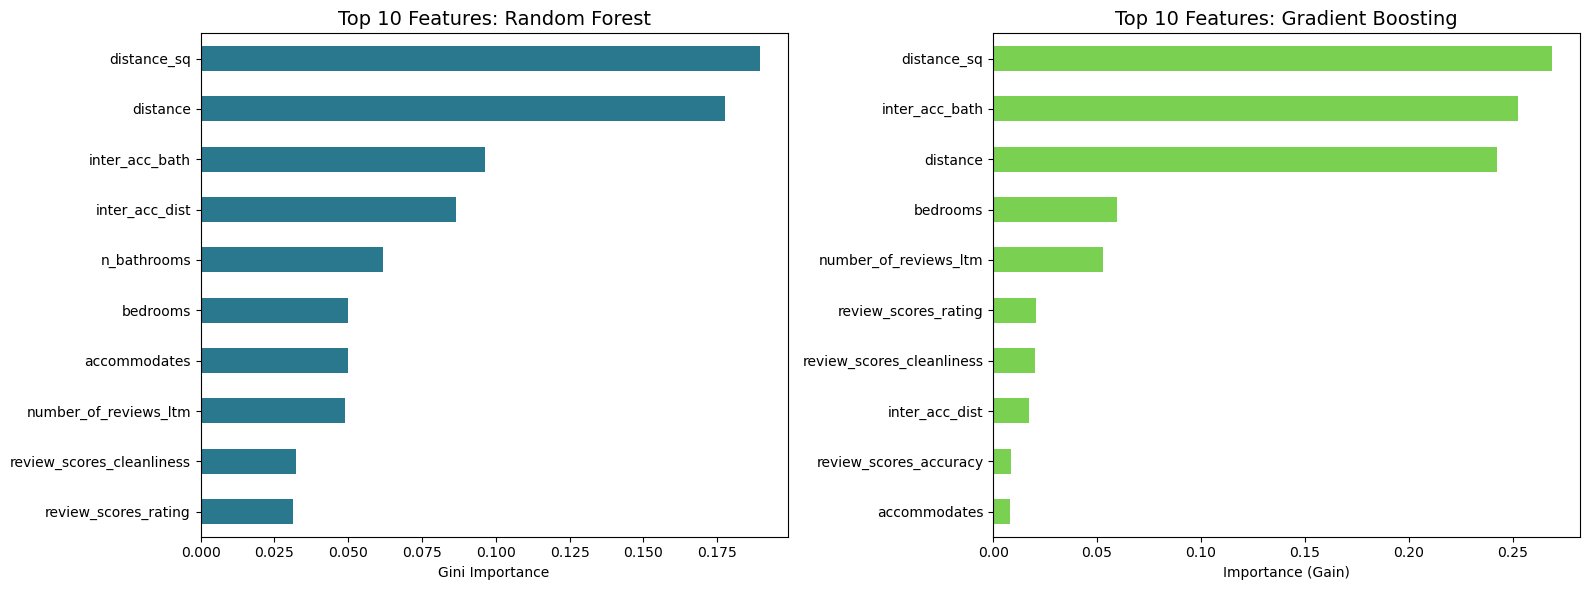

In [61]:
# Extracting top 10 features for both models
rf_importances = pd.Series(rf.feature_importances_, index=all_features).sort_values(ascending=True).tail(10)
gb_importances = pd.Series(gb_model.feature_importances_, index=all_features).sort_values(ascending=True).tail(10)

# Creating the side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Random Forest
rf_importances.plot(kind='barh', ax=axes[0], color=plt.cm.viridis(0.4))
axes[0].set_title('Top 10 Features: Random Forest', fontsize=14)
axes[0].set_xlabel('Gini Importance')

# Plot Gradient Boosting
gb_importances.plot(kind='barh', ax=axes[1], color=plt.cm.viridis(0.8))
axes[1].set_title('Top 10 Features: Gradient Boosting', fontsize=14)
axes[1].set_xlabel('Importance (Gain)')

plt.tight_layout()
plt.show()

### **Feature Importance Comparison and Discussion**

### Comparison of Top Features Across Models

Both the Random Forest and Gradient Boosting models identify **location-related variables as the most important predictors of Airbnb prices in Rome**. In both models, `distance_sq` is the single most important feature, followed closely by `distance`, highlighting the strong and nonlinear role of proximity to the city center in pricing.

A key similarity across models is the prominence of the interaction term `inter_acc_bath` (accommodates × bathrooms). Its high ranking—especially in the Gradient Boosting model—indicates that the value of additional bathrooms increases substantially with listing size, reinforcing the importance of layout–capacity interactions.

The models differ in how they treat secondary features. The Random Forest distributes importance more evenly across several size-related and review-related variables, including `accommodates`, `n_bathrooms`, `bedrooms`, and review scores. In contrast, Gradient Boosting concentrates importance on a smaller set of features, placing much greater weight on `distance_sq`, `distance`, and `inter_acc_bath`, while assigning relatively low importance to most review metrics and capacity variables.

Overall, both models agree on the core drivers of price—**nonlinear location effects and size–layout interactions**—but differ in emphasis. Random Forest captures a broader set of contributing factors, whereas Gradient Boosting focuses more sharply on the strongest predictors, consistent with its superior out-of-sample performance.

### Discussion of Findings

The feature importance analysis reveals a consistent and economically intuitive pricing structure across both nonlinear models. The dominant role of `distance` and its squared term confirms that **location is the primary driver of Airbnb prices in Rome**, with strong nonlinear effects: prices drop sharply as listings move away from the city center and then flatten at greater distances. This pattern aligns with both urban economic theory and earlier results from the OLS models.

Interaction terms involving capacity and layout—most notably `accommodates × bathrooms`—rank among the most important predictors, indicating that **amenities and layout scale nonlinearly with listing size**. Larger listings derive substantially more value from additional bathrooms, highlighting crowding and comfort effects that linear models cannot fully capture.


Overall, the findings suggest that **Airbnb pricing in Rome is driven by a combination of nonlinear location effects and size–layout interactions**, while host reputation and review characteristics play a secondary role. The consistency of these results across models strengthens confidence that they reflect fundamental market mechanisms rather than model-specific artifacts.

-----

## Part II. Validity

To assess the robustness of the pricing models, we evaluate them on two “live” datasets: (i) a later snapshot of the same market (Rome Q1) to test temporal stability, and (ii) a different city within the same country (Florence) to test spatial transferability. All datasets are processed using the same data-wrangling pipeline as the training data.

### 1) Data Wrangling

In [62]:
def wrangle_airbnb_data(df, center_lat, center_lon, original_medians=None):
    df = df.copy()
    
    # 1. Column Selection
    to_keep = [
        'price', 'host_is_superhost', 'latitude', 'longitude', 
        'neighbourhood_cleansed', 'property_type', 'room_type', 
        'accommodates', 'bedrooms', 'beds', 'bathrooms_text', 
        'amenities', 'number_of_reviews', 'number_of_reviews_ltm',
        'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'instant_bookable'
    ]
    df = df[to_keep].copy()

    # 2. Basic Cleaning
    df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
    df['d_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
    df['d_instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
    df['n_bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
    
    # 3. Haversine Distance
    def haversine(lat1, lon1, lat2, lon2):
        R = 6371.0
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat, dlon = lat2 - lat1, lon2 - lon1
        a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
        return R * 2 * np.arcsin(np.sqrt(a))

    df['distance'] = haversine(df['latitude'], df['longitude'], center_lat, center_lon)
    df['distance_sq'] = df['distance']**2

    # 4. Amenities
    amenity_list = ['Wifi', 'Air conditioning', 'Kitchen', 'Elevator', 'Heating']
    for am in amenity_list:
        col_name = f'd_{am.lower().replace(" ", "_")}'
        df[col_name] = df['amenities'].str.contains(am, case=False, na=False).astype(int)

    # 5. Null Handling (Flags + Imputation)
    to_impute = ['bedrooms', 'beds', 'n_bathrooms', 'review_scores_rating', 
                 'review_scores_accuracy', 'review_scores_cleanliness', 
                 'review_scores_checkin', 'review_scores_communication']
    
    for col in to_impute:
        df[f'flag_{col}'] = df[col].isna().astype(int)
        # Use provided medians from training to avoid leakage, else use local median
        fill_val = original_medians[col] if original_medians is not None else df[col].median()
        df[col] = df[col].fillna(fill_val)

    # 6. Property Type & Room Type Filtering (Business Case)
    df = df[df['room_type'] == 'Entire home/apt']
    standard_properties = ['Entire rental unit', 'Entire condo', 'Entire vacation home', 
                           'Entire home', 'Entire loft', 'Entire serviced apartment']
    df = df[df['property_type'].isin(standard_properties)]
    df['f_property_type'] = df['property_type'].replace({
        'Entire rental unit': 'Apartment', 'Entire condo': 'Apartment',
        'Entire serviced apartment': 'Apartment', 'Entire loft': 'Apartment',
        'Entire vacation home': 'House', 'Entire home': 'House'
    })

    # 7. Final Transformations
    df = df[(df['price'] >= 40) & (df['price'] <= 600)].copy()
    df['ln_price'] = np.log(df['price'])
    
    # Interaction terms used in your models
    df['inter_acc_dist'] = df['accommodates'] * df['distance']
    df['inter_acc_bath'] = df['accommodates'] * df['n_bathrooms']

    # 8. Categorical Dummies
    df = pd.get_dummies(df, columns=['neighbourhood_cleansed', 'f_property_type'], drop_first=True, dtype=int)
    
    return df

In [63]:
# 1. Save original training medians for imputation using your dataframe name (df_rome)
# We use this to ensure the new data is imputed exactly like the old data
to_impute = [
    'bedrooms', 'beds', 'n_bathrooms', 'review_scores_rating', 
    'review_scores_accuracy', 'review_scores_cleanliness', 
    'review_scores_checkin', 'review_scores_communication'
]
training_medians = df_rome[to_impute].median()

# 2. Define the Inside Airbnb URLs (no local CSVs)
ROME_Q1_URL = (
    "https://data.insideairbnb.com/italy/lazio/rome/2025-03-05/"
    "data/listings.csv.gz"
)

FLORENCE_URL = (
    "https://data.insideairbnb.com/italy/toscana/florence/2025-09-22/"
    "data/listings.csv.gz"
)

# 3. Process Rome Q1 (Later Date)
df_rome_q1_raw = pd.read_csv(ROME_Q1_URL, low_memory=False)
df_rome_q1 = wrangle_airbnb_data(
    df_rome_q1_raw,
    center_lat=41.8986,
    center_lon=12.4769,
    original_medians=training_medians
)

# 4. Process Florence (New City)
# Florence Center (Duomo): 43.7731, 11.2560
df_florence_raw = pd.read_csv(FLORENCE_URL, low_memory=False)
df_florence = wrangle_airbnb_data(
    df_florence_raw,
    center_lat=43.7731,
    center_lon=11.2560,
    original_medians=training_medians
)
print("Part II data wrangling complete.")

Part II data wrangling complete.


In [64]:
df_rome_q1.columns

Index(['price', 'host_is_superhost', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms_text',
       'amenities', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'instant_bookable', 'd_superhost',
       'd_instant_bookable', 'n_bathrooms', 'distance', 'distance_sq',
       'd_wifi', 'd_air_conditioning', 'd_kitchen', 'd_elevator', 'd_heating',
       'flag_bedrooms', 'flag_beds', 'flag_n_bathrooms',
       'flag_review_scores_rating', 'flag_review_scores_accuracy',
       'flag_review_scores_cleanliness', 'flag_review_scores_checkin',
       'flag_review_scores_communication', 'ln_price', 'inter_acc_dist',
       'inter_acc_bath', 'neighbourhood_cleansed_II Parioli/Nomentano',
       'neighbourhood_cleansed_III Monte Sacro',
       'neighbourhood_cleansed_IV Tiburtina', 'neig

In [65]:
df_florence.columns

Index(['price', 'host_is_superhost', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms_text',
       'amenities', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'instant_bookable', 'd_superhost',
       'd_instant_bookable', 'n_bathrooms', 'distance', 'distance_sq',
       'd_wifi', 'd_air_conditioning', 'd_kitchen', 'd_elevator', 'd_heating',
       'flag_bedrooms', 'flag_beds', 'flag_n_bathrooms',
       'flag_review_scores_rating', 'flag_review_scores_accuracy',
       'flag_review_scores_cleanliness', 'flag_review_scores_checkin',
       'flag_review_scores_communication', 'ln_price', 'inter_acc_dist',
       'inter_acc_bath', 'neighbourhood_cleansed_Centro Storico',
       'neighbourhood_cleansed_Gavinana Galluzzo',
       'neighbourhood_cleansed_Isolotto Legnaia',
     

### 2) Model Performance Comparison (Cross-Time and Cross-City)

In [66]:
from sklearn.metrics import mean_squared_error

# 1. Define the Alignment Function (Fixes your NameError)
def align_features(df, feature_list):
    """Ensures the new dataset has all features expected by the models."""
    df_aligned = df.copy()
    for col in feature_list:
        if col not in df_aligned.columns:
            df_aligned[col] = 0  # Add missing neighborhood dummies as 0
    return df_aligned[feature_list]

# 2. Align features for both new datasets
X_valid_rome = align_features(df_rome_q1, all_features)
X_valid_florence = align_features(df_florence, all_features)

# 3. Scale for LASSO (Uses the scaler you defined in Part I)
X_valid_rome_scaled = scaler.transform(X_valid_rome)
X_valid_florence_scaled = scaler.transform(X_valid_florence)

# 4. Helper for RMSE calculation
def get_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_v_rome = df_rome_q1['ln_price']
y_v_flo = df_florence['ln_price']

# 5. Generate Predictions for Rome Q1 (Later Date)
res_rome = [
    get_rmse(y_v_rome, model4.predict(df_rome_q1)), # OLS
    get_rmse(y_v_rome, lasso.predict(X_valid_rome_scaled)), # LASSO
    get_rmse(y_v_rome, rf.predict(X_valid_rome)), # Random Forest
    get_rmse(y_v_rome, gb_model.predict(X_valid_rome)), # Gradient Boosting
    get_rmse(y_v_rome, hgbm.predict(X_valid_rome)) # HistGBM
]

# 6. Generate Predictions for Florence (Other City)
res_flo = [
    get_rmse(y_v_flo, model4.predict(df_florence)),
    get_rmse(y_v_flo, lasso.predict(X_valid_florence_scaled)),
    get_rmse(y_v_flo, rf.predict(X_valid_florence)),
    get_rmse(y_v_flo, gb_model.predict(X_valid_florence)),
    get_rmse(y_v_flo, hgbm.predict(X_valid_florence))
]

# 7. Final Validity Table
validity_df = pd.DataFrame({
    'Model': ['OLS', 'LASSO', 'Random Forest', 'Gradient Boosting', 'HistGBM'],
    'Original (Rome Q3)': [0.3448, 0.3306, 0.3127, 0.3073, 0.3069],
    'Later Date (Rome Q1)': res_rome,
    'Other City (Florence)': res_flo
})

print("--- Table: Performance across Cities and Time ---")
display(validity_df.style.format(precision=4).highlight_min(subset=['Original (Rome Q3)','Later Date (Rome Q1)', 'Other City (Florence)'], color='lightgreen'))

--- Table: Performance across Cities and Time ---


,Model,Original (Rome Q3),Later Date (Rome Q1),Other City (Florence)
0,OLS,0.3448,0.3986,0.4023
1,LASSO,0.3306,0.3825,0.4240
2,Random Forest,0.3127,0.3466,0.4279
3,Gradient Boosting,0.3073,0.3598,0.4267
4,HistGBM,0.3069,0.3647,0.4235


### Model Performance and Validity Discussion

The external validity exercise provides a reality check on how the Rome-based pricing models perform when applied to new time periods and new geographies, revealing a clear trade-off between local precision and portability.

**Temporal validity (Rome Q1).**  
Applying the models to a later quarter in the same city leads to a moderate increase in RMSE for all specifications. While HistGBM performed best in the original Rome Q3 data, Random Forest achieves the lowest RMSE in Rome Q1, suggesting that its averaging structure may generalize slightly better to short-term market and seasonal changes than more finely tuned boosting models.

**Spatial validity (Florence).**  
The cross-city application represents a much stronger stress test, with RMSE increasing substantially for all models. Notably, the linear OLS model outperforms the more complex ensemble methods in Florence. This reflects the reliance of tree-based models on Rome-specific neighborhood interactions: when those high-dimensional location features are absent, their predictive advantage largely disappears, while the simpler linear structure remains more stable.

**Discussion and implications.**  
This exercise highlights the hidden costs of complex modeling. Feature alignment across cities proved challenging due to the use of numerous Rome-specific neighborhood dummies, underscoring that model portability is constrained by feature design. For a multi-city Airbnb operation, these results suggest that a single global model is suboptimal. Instead, flexible models such as HistGBM should be retrained locally using city-specific data to capture unique spatial and neighborhood effects.

### Extras:

### Prediction Errors by Distance: Rome vs. Florence

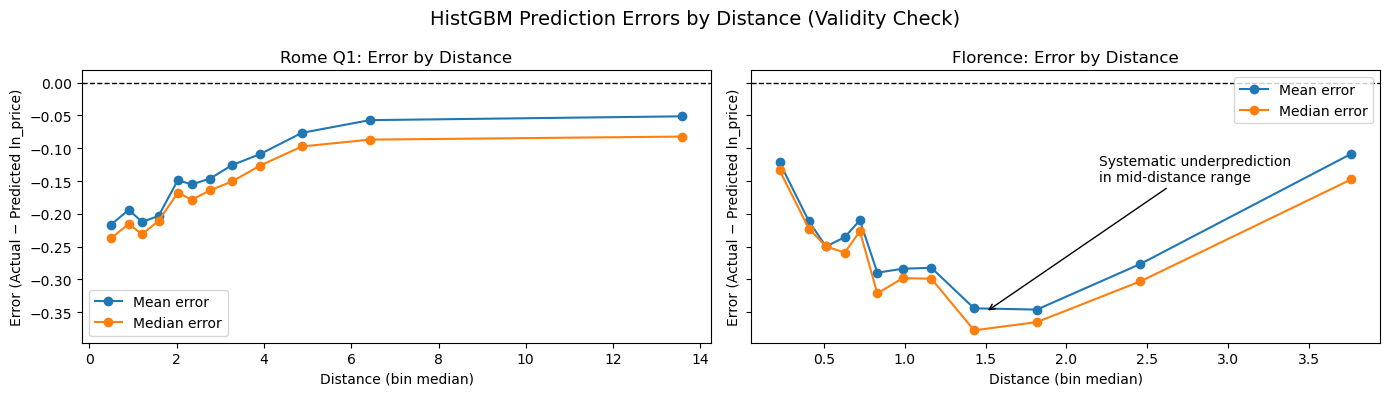

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def error_by_distance_bins_ax(df, y_true, y_pred, ax,
                              n_bins=10, title=""):
    tmp = pd.DataFrame({
        "distance": df["distance"].values,
        "err": (y_true - y_pred)
    }).dropna()

    tmp["dist_bin"] = pd.qcut(tmp["distance"], q=n_bins, duplicates="drop")

    summary = (
        tmp.groupby("dist_bin", observed=True)["err"]
        .agg(["mean", "median"])
    )
    mids = tmp.groupby("dist_bin", observed=True)["distance"].median()

    ax.plot(mids.values, summary["mean"].values,
            marker="o", label="Mean error")
    ax.plot(mids.values, summary["median"].values,
            marker="o", label="Median error")

    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.set_xlabel("Distance (bin median)")
    ax.set_ylabel("Error (Actual − Predicted ln_price)")
    ax.set_title(title)
    ax.legend()

    # Predictions from champion model (HistGBM)
pred_rome_q1 = hgbm.predict(X_valid_rome)
pred_florence = hgbm.predict(X_valid_florence)

# Create side-by-side figure
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

error_by_distance_bins_ax(
    df_rome_q1, y_v_rome, pred_rome_q1,
    ax=axes[0],
    n_bins=12,
    title="Rome Q1: Error by Distance"
)

error_by_distance_bins_ax(
    df_florence, y_v_flo, pred_florence,
    ax=axes[1],
    n_bins=12,
    title="Florence: Error by Distance"
)

axes[1].annotate(
    "Systematic underprediction\nin mid-distance range",
    xy=(1.5, -0.35),
    xytext=(2.2, -0.15),
    arrowprops=dict(arrowstyle="->")
)

plt.suptitle("HistGBM Prediction Errors by Distance (Validity Check)", fontsize=14)
plt.tight_layout()
plt.show()

👆🏻 This figure shows distance-binned prediction errors for the Rome-trained HistGBM model applied to a later period in Rome (left) and to Florence (right). In Rome Q1, errors are relatively small and fairly stable across distance bins, indicating good temporal generalization with only mild underprediction. In contrast, errors in Florence are larger and vary strongly with distance, revealing systematic spatial bias. The model substantially underpredicts prices at certain distance ranges, highlighting that location effects learned in Rome do not transfer cleanly to another city. Overall, the plot illustrates that while the model generalizes reasonably over time within the same city, its performance deteriorates across space, emphasizing the need for city-specific retraining.

### Local Retraining Experiment:

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np

# Split Florence into a small train and a test
Xf_tr, Xf_te, yf_tr, yf_te = train_test_split(
    X_valid_florence, y_v_flo, test_size=0.8, random_state=42
)

# Train a local Florence model (same class as your champion)
hgbm_flo = HistGradientBoostingRegressor(random_state=42)
hgbm_flo.fit(Xf_tr, yf_tr)

# Compare: Rome-trained model vs locally trained model on Florence test set
pred_global = hgbm.predict(Xf_te)
pred_local = hgbm_flo.predict(Xf_te)

rmse_global = np.sqrt(mean_squared_error(yf_te, pred_global))
rmse_local = np.sqrt(mean_squared_error(yf_te, pred_local))

print("Florence test RMSE using Rome-trained HistGBM:", round(rmse_global, 4))
print("Florence test RMSE using locally trained HistGBM:", round(rmse_local, 4))

Florence test RMSE using Rome-trained HistGBM: 0.4242
Florence test RMSE using locally trained HistGBM: 0.3515


👆🏻To assess whether poor cross-city performance reflects model limitations or data mismatch, we retrain the HistGBM model using a small subset of Florence data. The locally trained model achieves a substantially lower RMSE (0.3515) compared to the Rome-trained model applied to Florence (0.4242). This demonstrates that the performance drop in Florence is driven by city-specific spatial patterns rather than model inadequacy, and that retraining on local data is essential for effective deployment.

### Learning Curve Analysis:

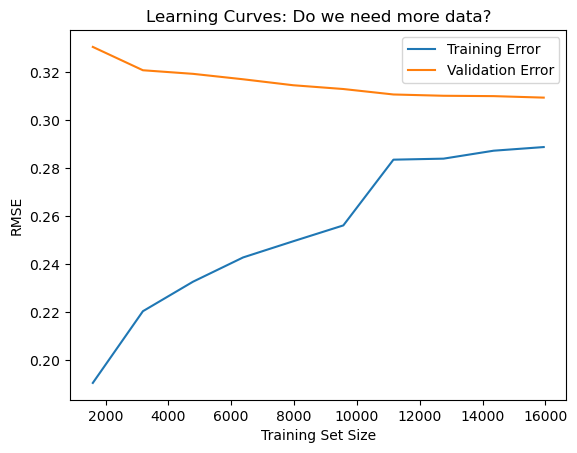

In [69]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    hgbm, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training Error')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation Error')
plt.title('Learning Curves: Do we need more data?')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

👆🏻 This section examines how model performance evolves with increasing training data to assess whether additional listings would improve pricing accuracy.